In [1]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

array_basal = np.genfromtxt("Basal_pac1.txt", delimiter="\t")
array_Respiracion = np.genfromtxt("Post_ejercicio_pac1.txt", delimiter="\t")
array_ejercicio = np.genfromtxt("Respiracion_pac1.txt", delimiter="\t")

d_sensor_basal= array_basal[:,-2]; print(len(d_sensor_basal)) #Imprimimos las longitudes
d_sensor_respi = array_Respiracion[:,-2]; print(len(d_sensor_respi))
d_sensor_ejer = array_ejercicio[:,-2]; print(len(d_sensor_ejer))

#Al imprimir las señales notamos que estas tienen una longitud mayor a un multiplo de 1000 (fs)
#Será necesario modificar el tamaño de los arrays para proseguir con los dataset
d_sensor_basal = d_sensor_basal[300:]
d_sensor_respi = d_sensor_respi[550:]
d_sensor_ejer = d_sensor_ejer[450:]

33600
36300
36300


(0.0, 5000.0)

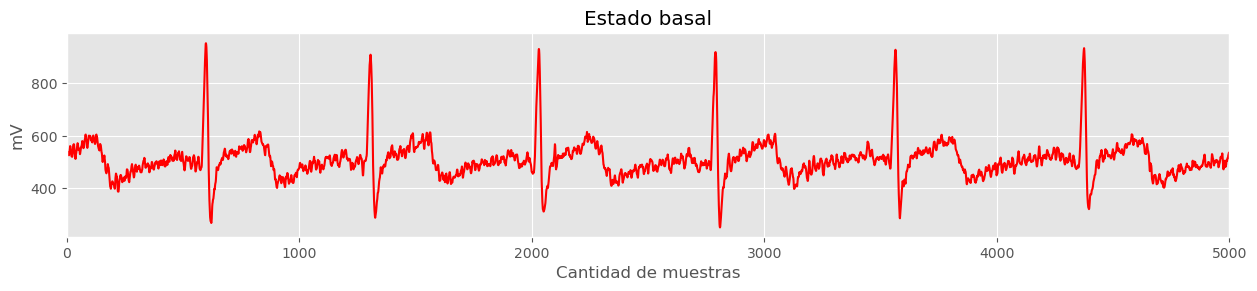

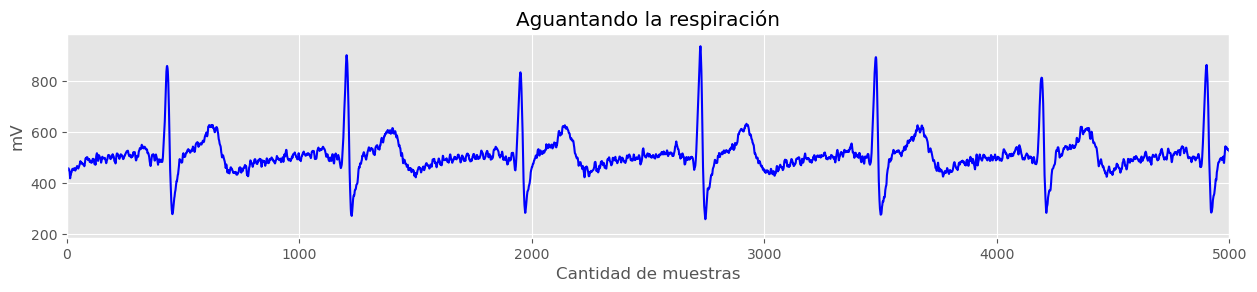

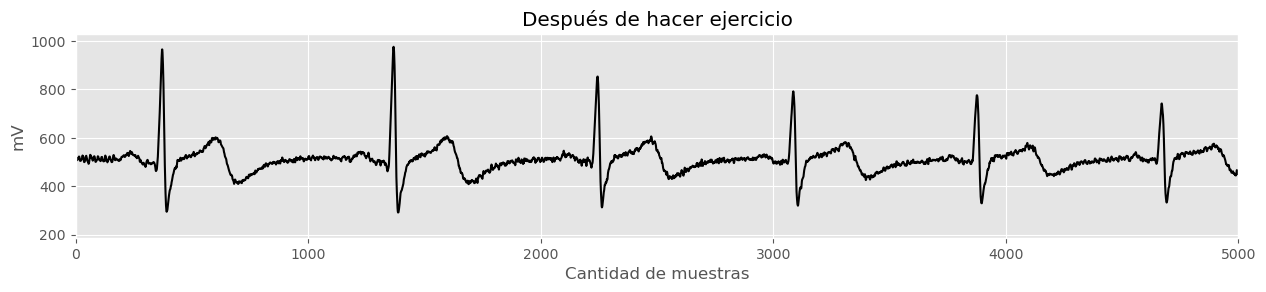

In [2]:
#Plot de las señales en un dominio de 0 a 5000 samples
plt.figure(figsize=(15, 9));plt.subplot(3,1,1);plt.plot(d_sensor_basal,'r');plt.title('Estado basal');plt.xlabel('Cantidad de muestras'); plt.ylabel('mV');plt.xlim(0,5000)
plt.figure(figsize=(15, 9));plt.subplot(3,1,2);plt.plot(d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Cantidad de muestras');plt.ylabel('mV');plt.xlim(0,5000)
plt.figure(figsize=(15, 9));plt.subplot(3,1,3);plt.plot(d_sensor_ejer,'k');plt.title('Después de hacer ejercicio');plt.xlabel('Cantidad de muestras');plt.ylabel('mV');plt.xlim(0,5000)

## 1. Analisis de Frecuencia de las señales

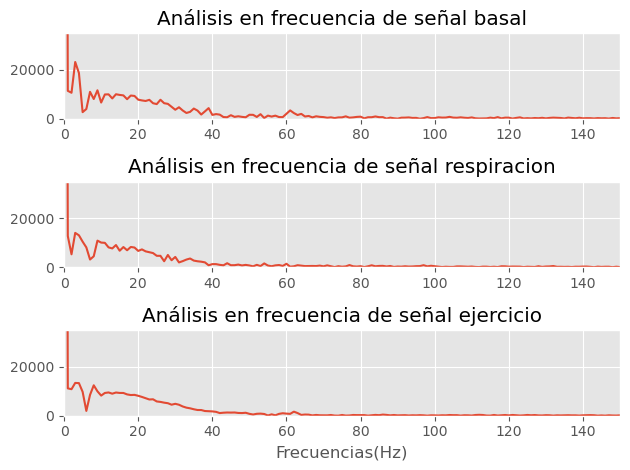

In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

#Señal a analizar : SEÑAL BASAL
senal1=d_sensor_basal
senal2=d_sensor_respi
senal3=d_sensor_ejer

#Realizamos el análisis en frecuencia
Fs=1000
N=2**10 # 10 bits

X3 = np.fft.fft(senal1,N)
X3 = X3[0:N//2]
X3m = np.abs(X3)
F = np.linspace(0,Fs/2,N//2)
plt.subplot(311)
plt.plot(abs(X3));plt.xlim(0,150);plt.ylim(0,35000);
plt.title('Análisis en frecuencia de señal basal')

X4 = np.fft.fft(senal2,N)
X4 = X4[0:N//2]
X4m = np.abs(X4)
plt.subplot(312)
F = np.linspace(0,Fs/2,N//2)
plt.plot(abs(X4));plt.xlim(0,150);plt.ylim(0,35000);
plt.title('Análisis en frecuencia de señal respiracion')

X5 = np.fft.fft(senal3,N)
X5 = X5[0:N//2]
X5m = np.abs(X5)
F = np.linspace(0,Fs/2,N//2)
plt.subplot(313)
plt.plot(abs(X5));plt.xlim(0,150);plt.ylim(0,35000);
plt.title('Análisis en frecuencia de señal ejercicio');plt.xlabel('Frecuencias(Hz)')

plt.tight_layout()

## 2. Filtros : IIR y FIR

### IIR : Butterworth

Orden del filtro: 9
Frecuencia de corte calculada: 14.96 hz
[3.45323151e-10 6.97348097e-09 7.03078811e-08 ... 2.90127914e+02
 2.96872204e+02 3.05197314e+02]


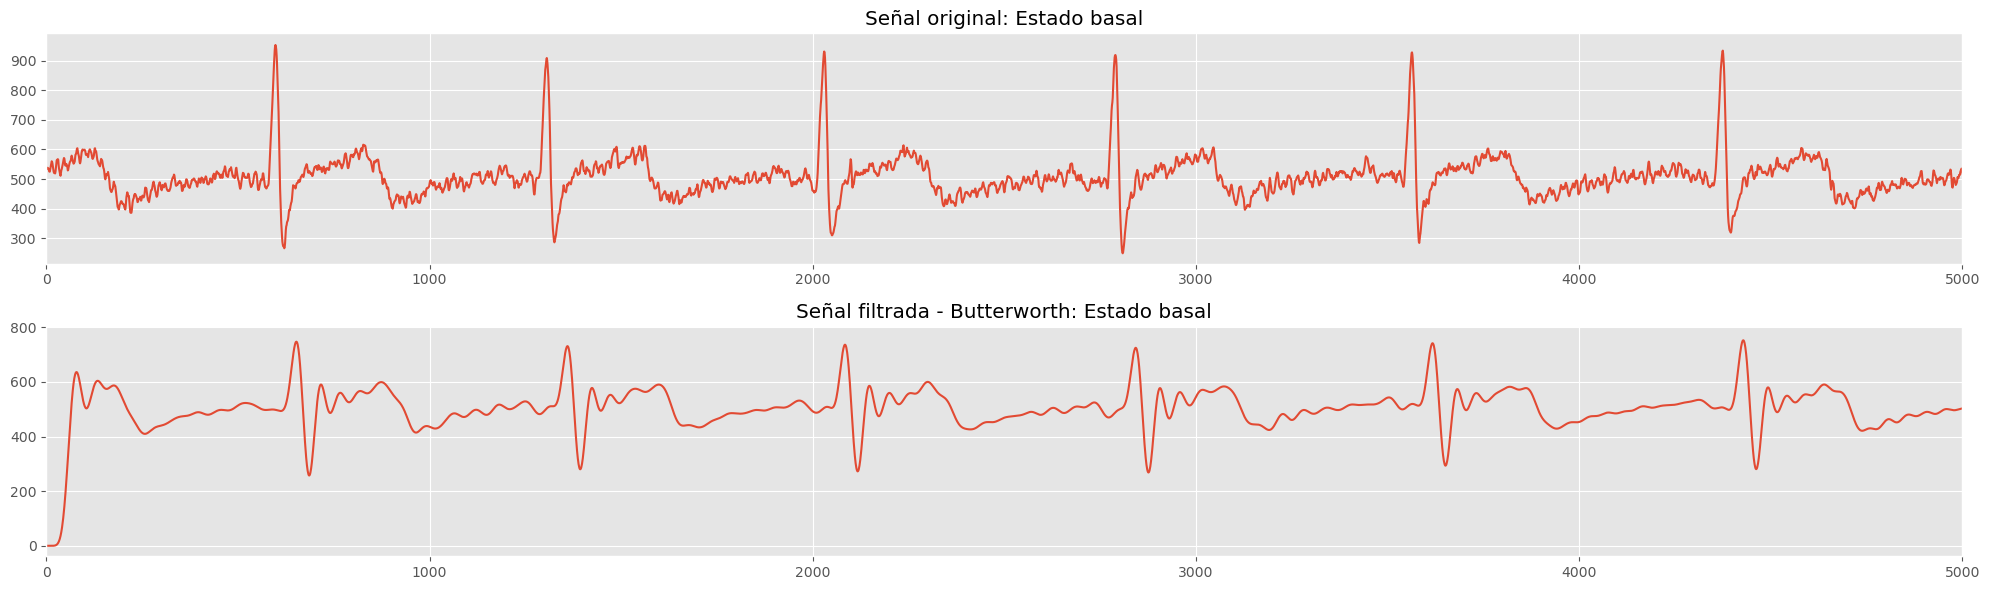

In [20]:
#calculamos el orden de filtro y la frecuencia de corte sugerida
#IIR
#----------------------------------Señal Basal-------------------------------------------
wp=94
ws=157
N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 

print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")
#usamos la sugerencia


#Usamos la fc sugerida
senal=d_sensor_basal
Wc=20*2*np.pi
Fs=1000
N_ord=10
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, senal)

t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,senal);plt.title('Señal original: Estado basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada - Butterworth: Estado basal');plt.xlim(0,5000)
plt.tight_layout()
print(y)

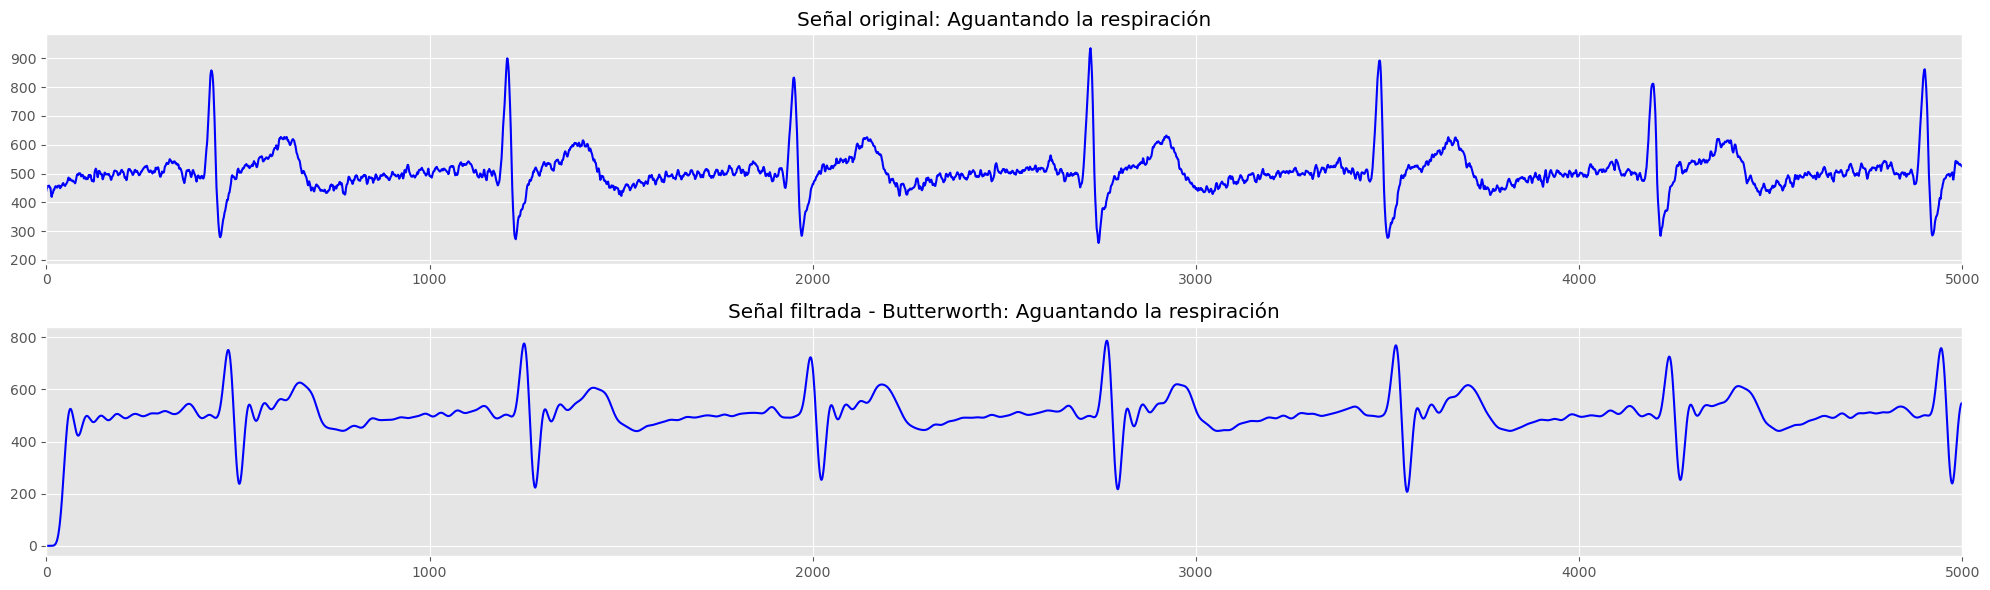

In [21]:
senal=d_sensor_respi
#Usamos la fc sugerida
#IIR
#----------------------------------Señal Respiracion-------------------------------------------
Wc=25*2*np.pi
Fs=1000
N_ord=10

b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, senal)
t=np.arange(0,len(y))

plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,senal,'b');plt.title('Señal original: Aguantando la respiración');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'b');plt.title('Señal filtrada - Butterworth: Aguantando la respiración');plt.xlim(0,5000)
plt.tight_layout()

[3.29276536e-10 6.64937481e-09 6.70382977e-08 ... 5.13630809e+02
 5.13824049e+02 5.14014995e+02]


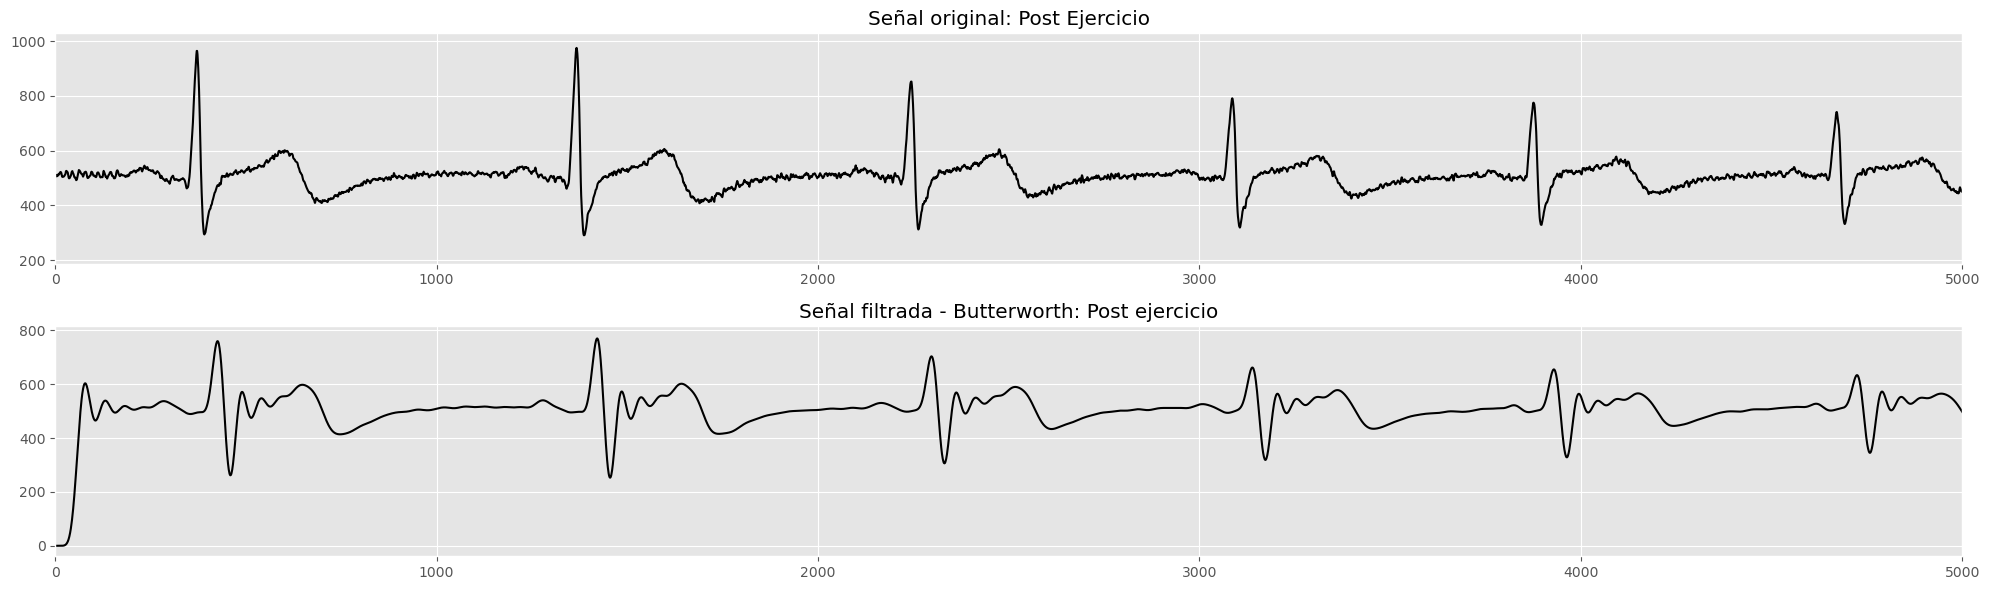

In [22]:
senal=d_sensor_ejer
#Usamos la fc sugerida
#IIR
#----------------------------------Señal Despues de ejercicio-------------------------------------------
Wc=20*2*np.pi
Fs=1000 
N_ord=10

b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, senal)
t=np.arange(0,len(y))

plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,senal,'k');plt.title('Señal original: Post Ejercicio');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada - Butterworth: Post ejercicio');plt.xlim(0,5000)
print(y)
plt.tight_layout()

(0.0, 5000.0)

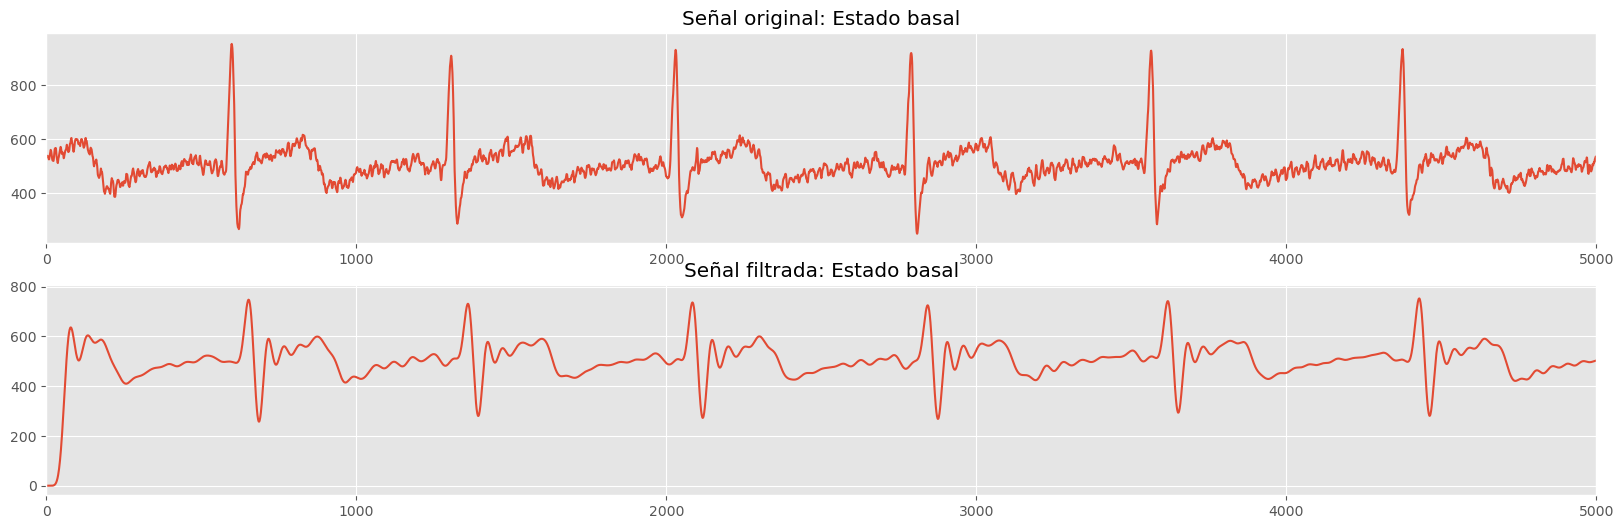

In [24]:
Fs = 1000
b_eliptic = np.array([0.009932,-0.09761,0.4333,-1.144,1.991,-2.385,1.991,-1.144,0.4333,-0.09761,0.009932])
a_eliptic = np.array([1,-9.87,43.89,-115.8,200.9,-239.2,198.1,-112.6,42.08,-9.328,0.9318])
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, d_sensor_basal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_basal);plt.title('Señal original: Estado basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada: Estado basal');plt.xlim(0,5000)

(0.0, 5000.0)

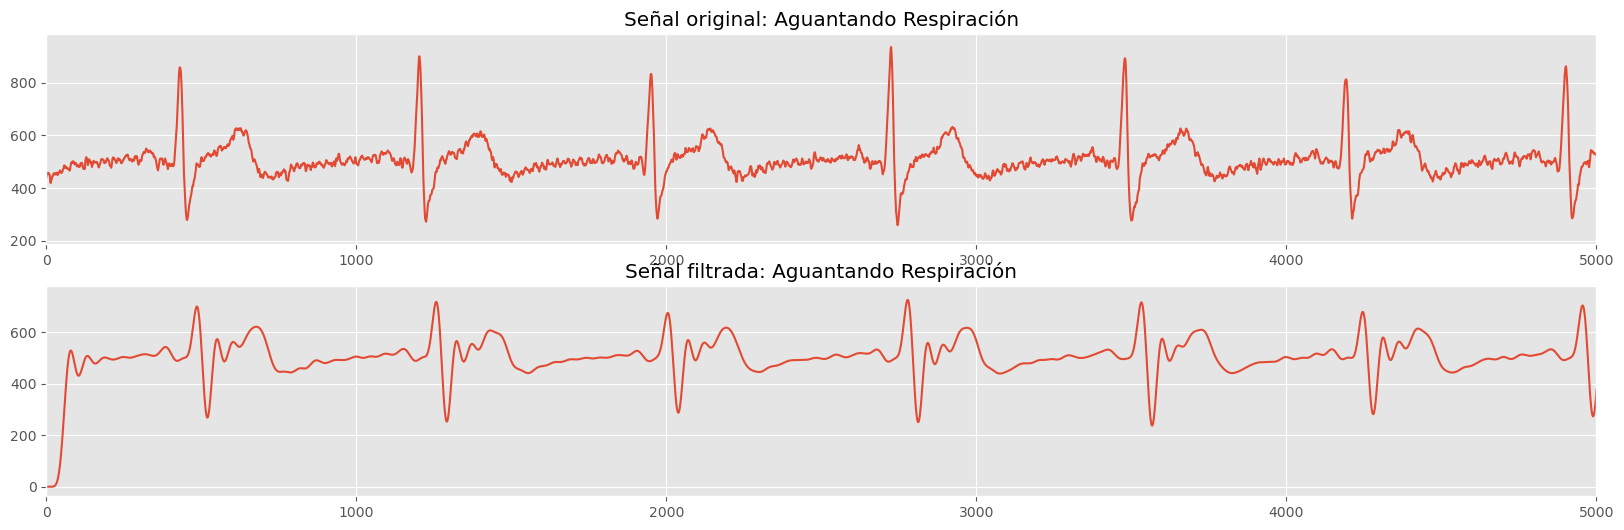

In [25]:
Fs = 1000
b_eliptic = np.array([0.009932,-0.09761,0.4333,-1.144,1.991,-2.385,1.991,-1.144,0.4333,-0.09761,0.009932])
a_eliptic = np.array([1,-9.87,43.89,-115.8,200.9,-239.2,198.1,-112.6,42.08,-9.328,0.9318])
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, d_sensor_respi)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_respi);plt.title('Señal original: Aguantando Respiración');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada: Aguantando Respiración');plt.xlim(0,5000)

(0.0, 5000.0)

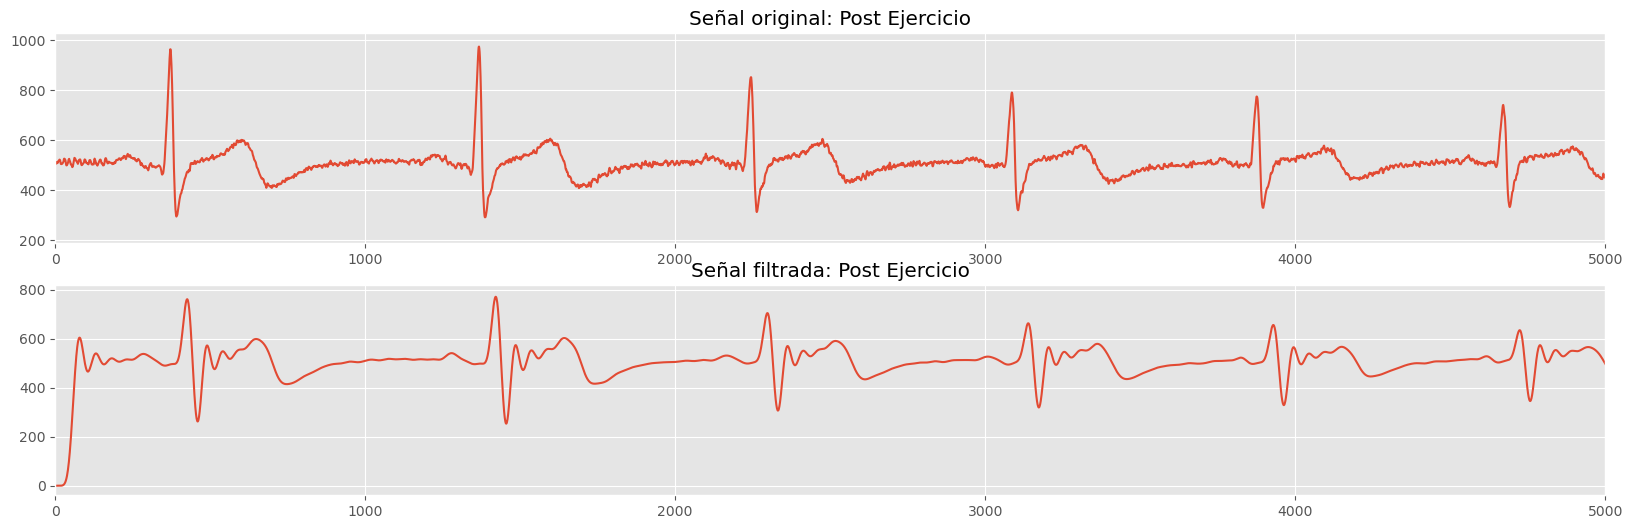

In [26]:
Fs = 1000
b_eliptic = np.array([0.009932,-0.09761,0.4333,-1.144,1.991,-2.385,1.991,-1.144,0.4333,-0.09761,0.009932])
a_eliptic = np.array([1,-9.87,43.89,-115.8,200.9,-239.2,198.1,-112.6,42.08,-9.328,0.9318])
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, d_sensor_ejer)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_ejer);plt.title('Señal original: Post Ejercicio');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada: Post Ejercicio');plt.xlim(0,5000)

(0.0, 5000.0)

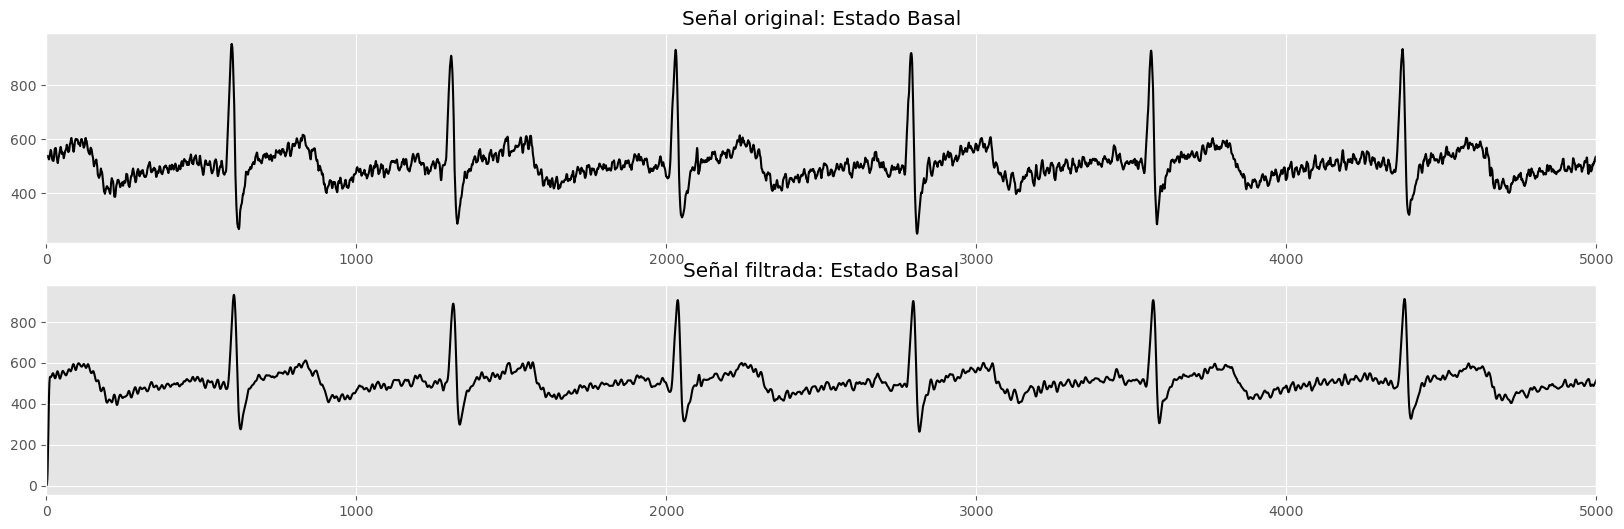

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Coeficientes extraidos de Pyfda
#FIR
b_blackman = np.array([-2.094552056898734e-18,0.003034066721839687,0.014580168473481207,0.0390825116714423,0.0772588321610623,0.12172524448293782,0.15816651137549176,0.17230533022748998,0.15816651137549176,0.12172524448293782,0.0772588321610623,0.0390825116714423,0.014580168473481207,0.003034066721839687,-2.094552056898734e-18])
y = lfilter(b_blackman, np.array(1),d_sensor_basal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_basal,'k');plt.title('Señal original: Estado Basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Estado Basal');plt.xlim(0,5000)

(0.0, 5000.0)

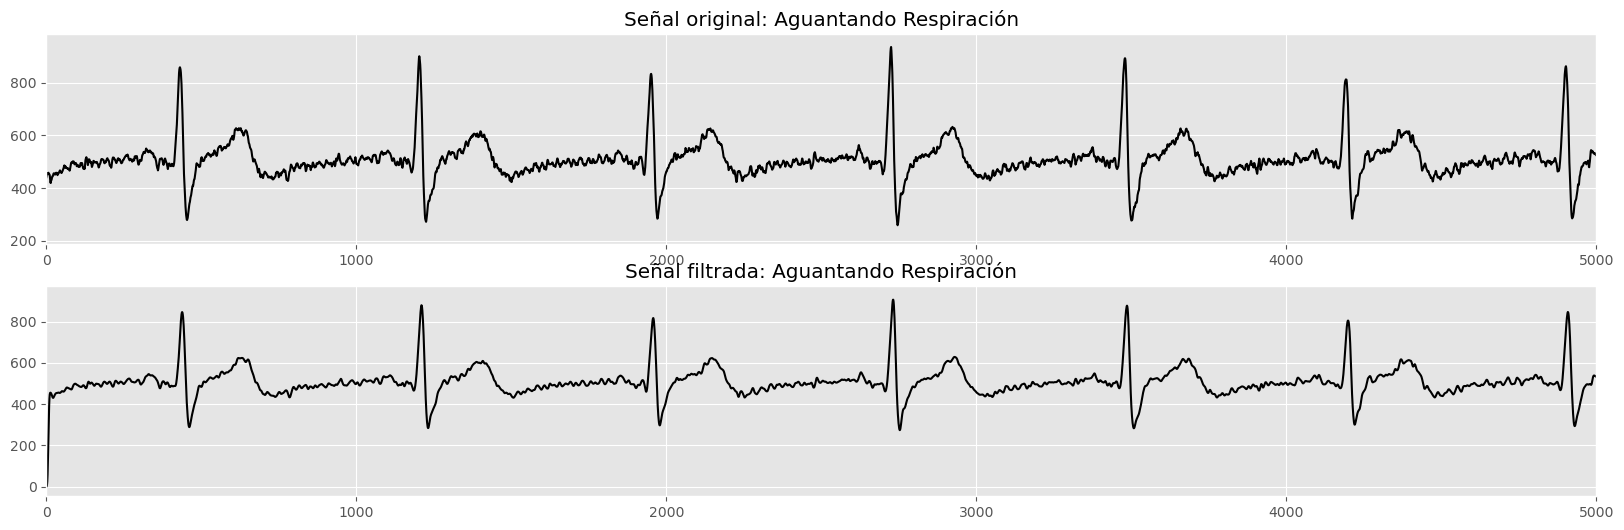

In [28]:
#FIR
y = lfilter(b_blackman, np.array(1),d_sensor_respi)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_respi,'k');plt.title('Señal original: Aguantando Respiración');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Aguantando Respiración');plt.xlim(0,5000)

(0.0, 5000.0)

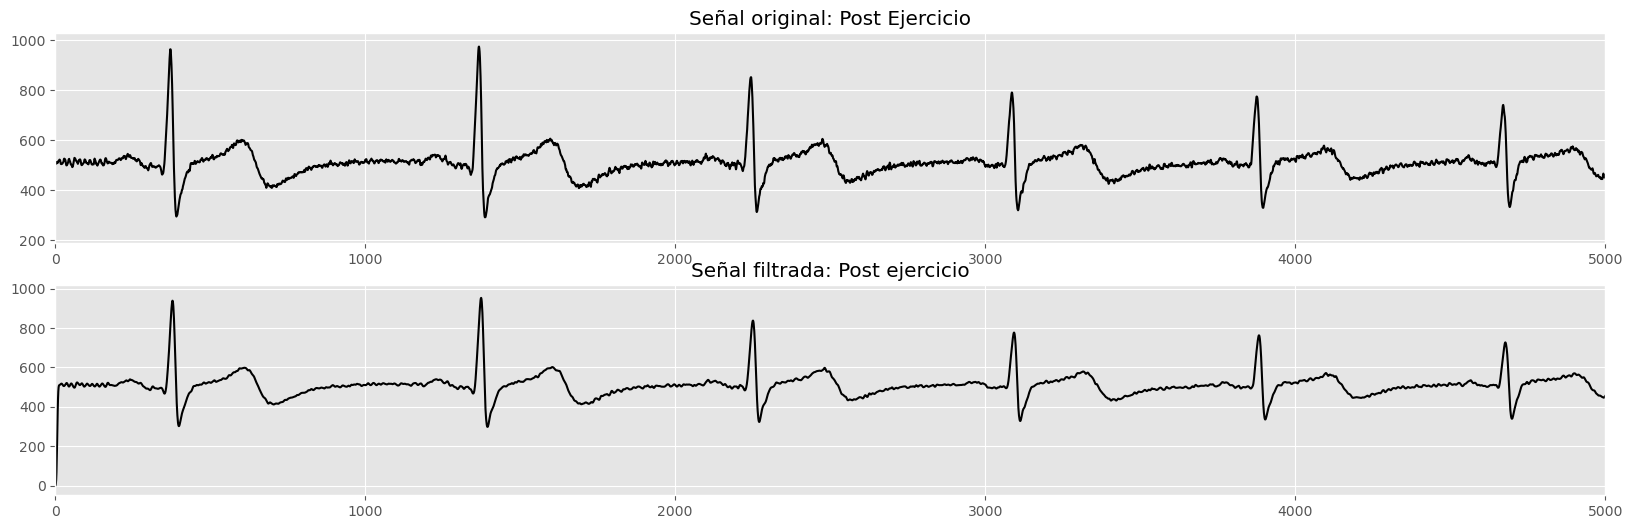

In [29]:
#FIR
y = lfilter(b_blackman, np.array(1),d_sensor_ejer)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_ejer,'k');plt.title('Señal original: Post Ejercicio');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Post ejercicio');plt.xlim(0,5000)

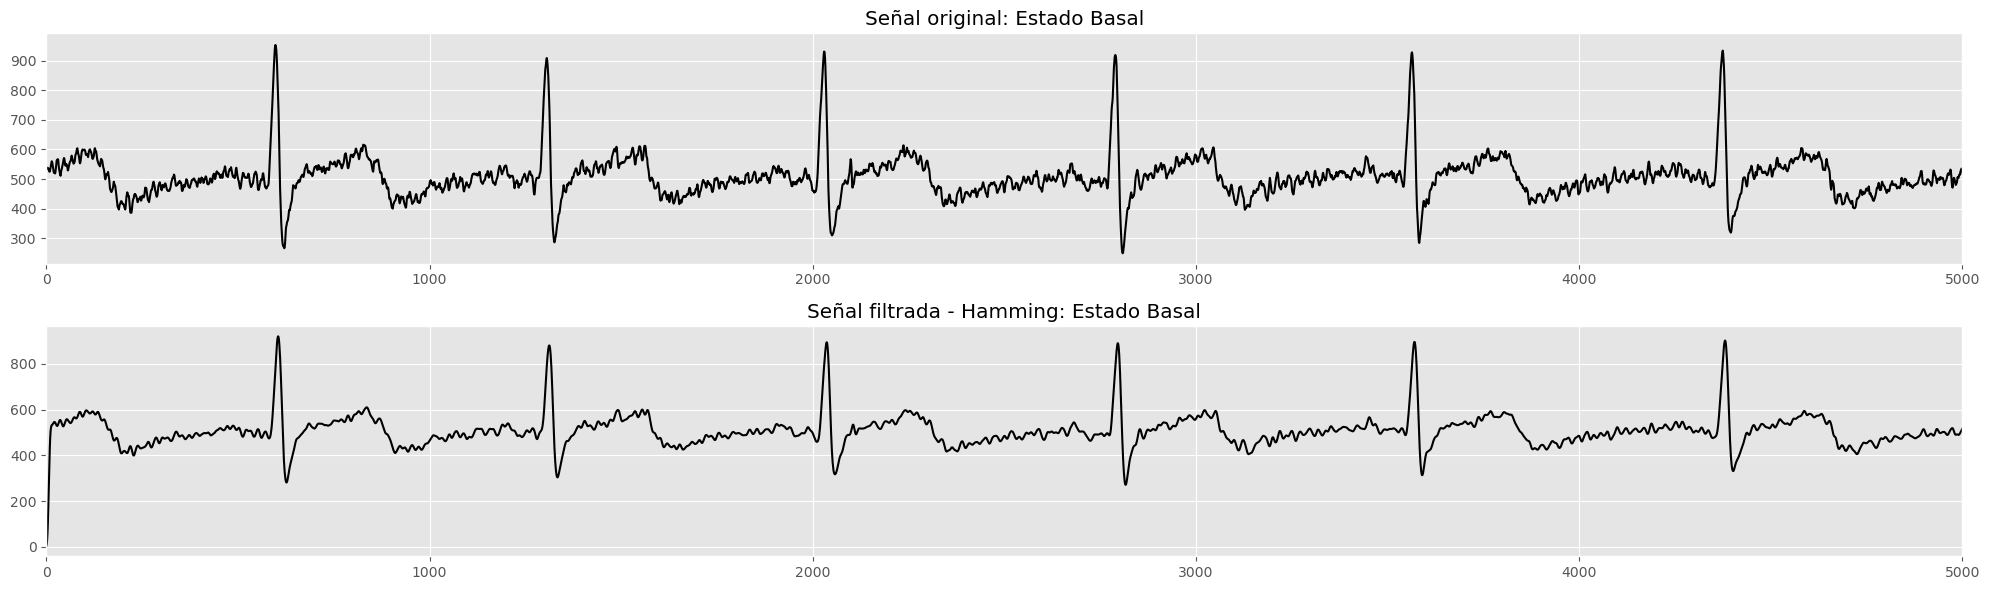

In [30]:

b_Hamming = np.array([0.009374095127456605,0.015248989077090288,0.03168550100018446,0.05610992951780696,0.08390910152312904,0.10944317615842664,0.12734290789953823,0.13377259939273567,0.12734290789953823,0.10944317615842664,0.08390910152312904,0.05610992951780696,0.03168550100018446,0.015248989077090288,0.009374095127456605])
y = lfilter(b_Hamming, np.array(1),d_sensor_basal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_basal,'k');plt.title('Señal original: Estado Basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada - Hamming: Estado Basal');plt.xlim(0,5000)
plt.tight_layout()

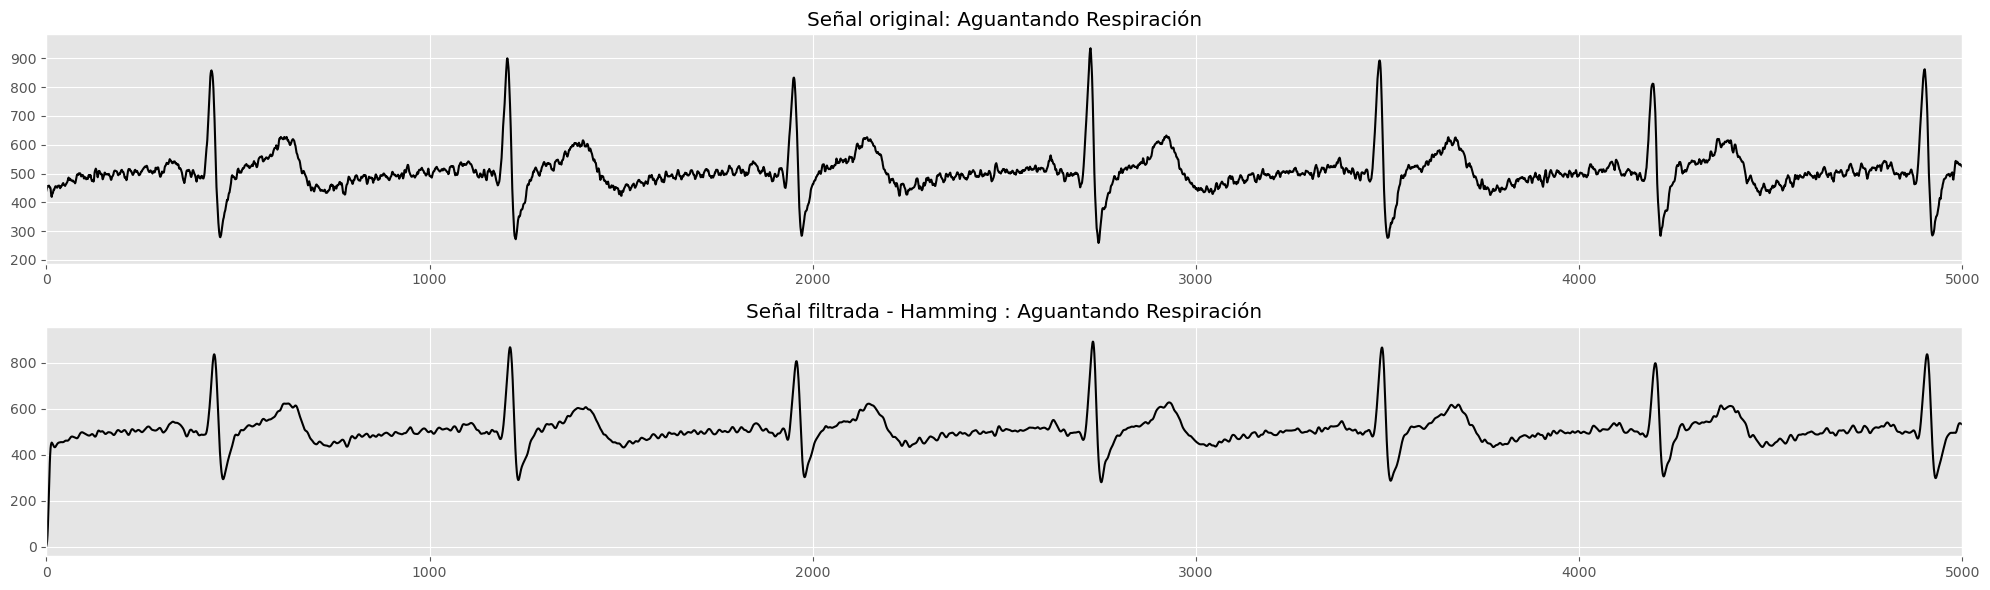

In [31]:
y = lfilter(b_Hamming, np.array(1),d_sensor_respi)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_respi,'k');plt.title('Señal original: Aguantando Respiración');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada - Hamming : Aguantando Respiración');plt.xlim(0,5000)
plt.tight_layout()

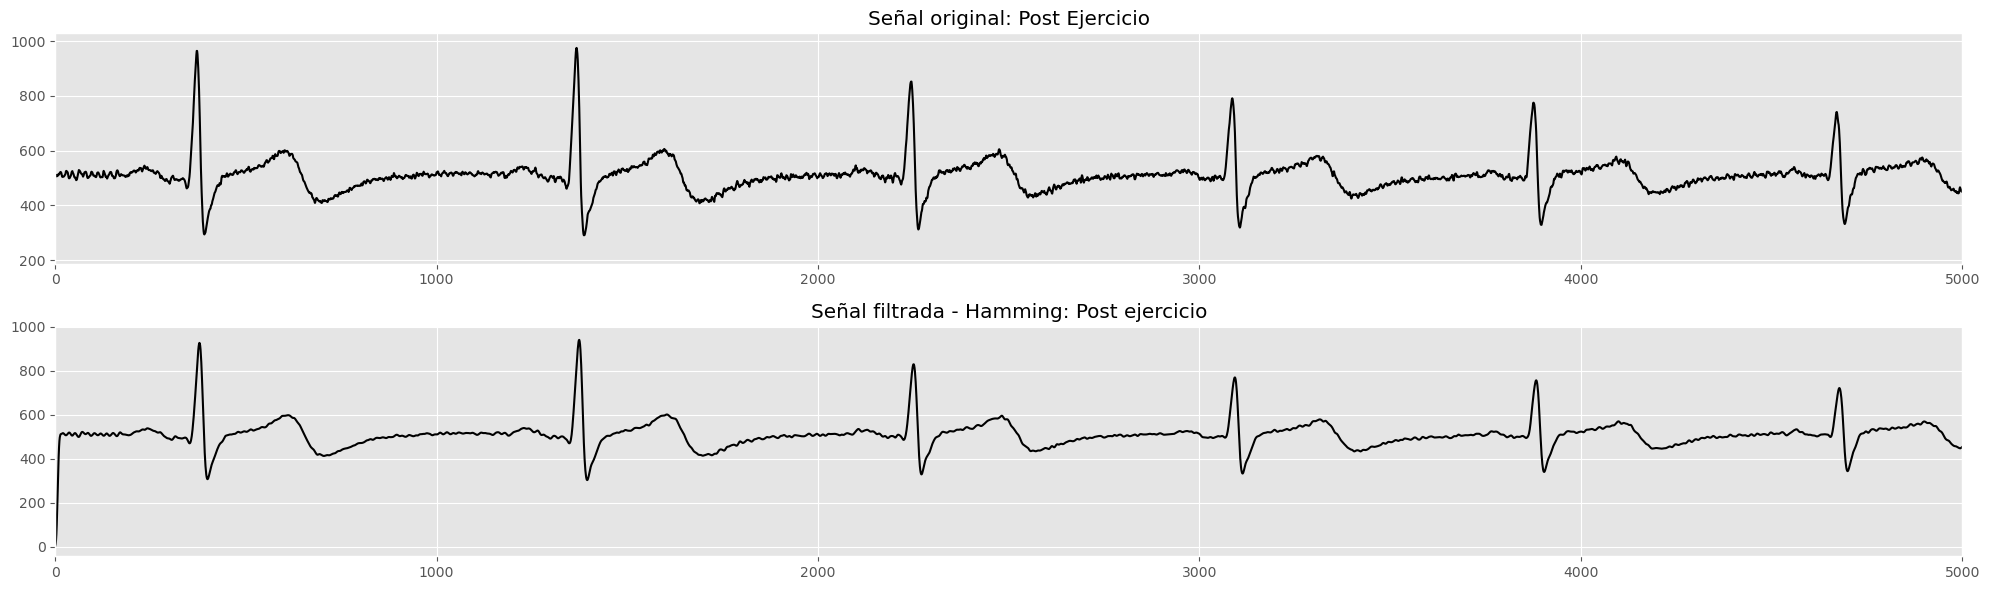

In [32]:

y = lfilter(b_Hamming, np.array(1),d_sensor_ejer)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_ejer,'k');plt.title('Señal original: Post Ejercicio');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada - Hamming: Post ejercicio');plt.xlim(0,5000)
plt.tight_layout()